In [70]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
df  = pd.read_csv('/content/sample_data/Master_project_ab_testing.csv')

In [2]:
df  = pd.read_csv('Master_project_ab_testing.csv')

In [34]:
df

,id,country,gender,group,join_dt,device,dt,device.1,spent
0,1010340,USA,F,B,2023-01-30,A,NaN,NaN,0.0
1,1020252,BRA,M,A,2023-01-27,A,NaN,NaN,0.0
2,1017309,BRA,M,A,2023-01-28,A,NaN,NaN,0.0
3,1002379,BRA,F,A,2023-02-03,A,NaN,NaN,0.0
4,1004713,TUR,NaN,B,2023-01-31,A,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
49077,1048582,GBR,M,B,2023-01-28,I,NaN,NaN,0.0
49078,1028525,FRA,F,B,2023-01-28,A,NaN,NaN,0.0
49079,1029872,USA,M,B,2023-01-30,A,2023-01-30,A,23.0
49080,1034053,DEU,F,A,2023-01-29,A,NaN,NaN,0.0


In [53]:
aa = df[['id','spent','group']].groupby(['id','group'])['spent'].sum()

In [54]:
aa

id       group
1000000  B        0.0
1000001  A        0.0
1000002  A        0.0
1000003  B        0.0
1000004  A        0.0
                 ... 
1049995  B        0.0
1049996  A        0.0
1049997  B        0.0
1049998  B        0.0
1049999  B        0.0
Name: spent, Length: 48943, dtype: float64

In [59]:
df_aggregated = df.groupby(['id','group'])['spent'].sum()


In [60]:
df_aggregated

id       group
1000000  B        0.0
1000001  A        0.0
1000002  A        0.0
1000003  B        0.0
1000004  A        0.0
                 ... 
1049995  B        0.0
1049996  A        0.0
1049997  B        0.0
1049998  B        0.0
1049999  B        0.0
Name: spent, Length: 48943, dtype: float64

In [6]:
a = df.groupby('group')['id'].nunique()

In [7]:
a


group
A    24343
B    24600
Name: id, dtype: int64

In [8]:
mean1 = a.mean()

In [9]:
mean1

24471.5

In [10]:
sum1 = df['spent'].sum()

In [11]:
sum1

165561.22993358204

In [12]:

max1 = df['spent'].max()
min1 = df['spent'].min()
count1 = df['spent'].count()
median1 = df['spent'].median() 
std1 = df['spent'].std() 
var1 = df['spent'].var()  

In [77]:
stats_spent = df_aggregated.groupby('group').agg(['mean', 'std', 'count', 'sum','min','max'])

In [78]:
stats_spent

,mean,std,count,sum,min,max
group,,,,,,
A,3.374518,25.936391,24343,82145.903065,0.0,1659.4
B,3.390867,25.414110,24600,83415.326869,0.0,1546.3


In [15]:
count_a = stats_spent['count'][0]
count_b = stats_spent['count'][1]

In [16]:
mean_a = stats_spent['mean'][0]
mean_b = stats_spent['mean'][1]

In [17]:
std_a = stats_spent['std'][0]
std_b = stats_spent['std'][1]

In [64]:
z_critical = stats.norm.ppf(q = 0.975)

In [65]:
z_critical

1.959963984540054

In [92]:
margin_of_error_a = z_critical * std_a/np.sqrt(count_a)
margin_of_error_b = z_critical * std_b/np.sqrt(count_b)

In [93]:
confidence_interval_a = (mean_a - margin_of_error_a,mean_a + margin_of_error_a)

In [94]:
confidence_interval_a

(3.0487038399601043, 3.700333095897578)

In [95]:
confidence_interval_b = (mean_b - margin_of_error_b,mean_b + margin_of_error_b)

In [96]:
confidence_interval_b

(3.073285270142202, 3.7084486216293646)

25.43958203959349


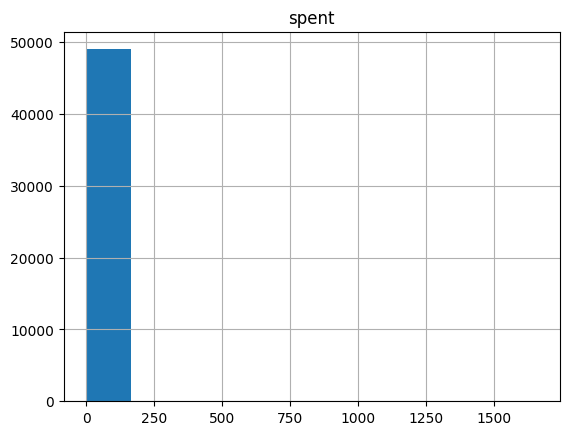

In [81]:
pd.DataFrame(df['spent']).hist()

print( stats.skew(df['spent']) );